# MALL CUSTOMER SEGMENTATION & ANALYSIS

Pada project ini akan dilakukan customer segmentation dengan menggunakan data mall customers. Adapun kolom pada data mall customers adalah sebagai berikut :
1. CustomerID : Id yang dimiliki pada masing-masing customer
2. Gender : Jenis kelamin dari customer
3. Annual Income : Pendapatan tahunan customer ($)
4. Spending Score : Skor yang dimiliki customer berdasarkan nilai belanja pada mall tersebut (1-100)

# IMPORT LIBRARY

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings('ignore')
py.offline.init_notebook_mode(connected = True)

In [66]:
customers = pd.read_csv('D:/TUGAS KULIAH/DATASET BELAJAR DATA SCIENCE/Mall_Customers.csv')
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [67]:
customers.shape

(200, 5)

In [68]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [69]:
#Mengubah variabel dibawah dengan menjadi object
obj_features = ['CustomerID']
for colname in obj_features:
  customers[colname] = customers[colname].astype('object')

In [70]:
customers.dtypes

CustomerID                object
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [71]:
customers.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [72]:
customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# DATA VISUALIZATION

In [73]:
plt.style.use('fivethirtyeight')

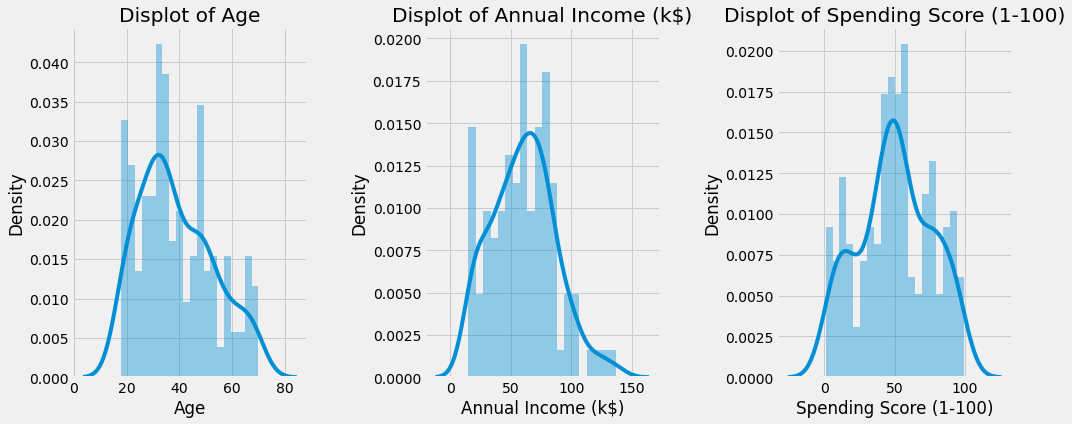

In [74]:
plt.figure(1, figsize = (15, 6))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)'] :
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(customers[x], bins=20)
    plt.title('Displot of {}'.format(x))
plt.show()

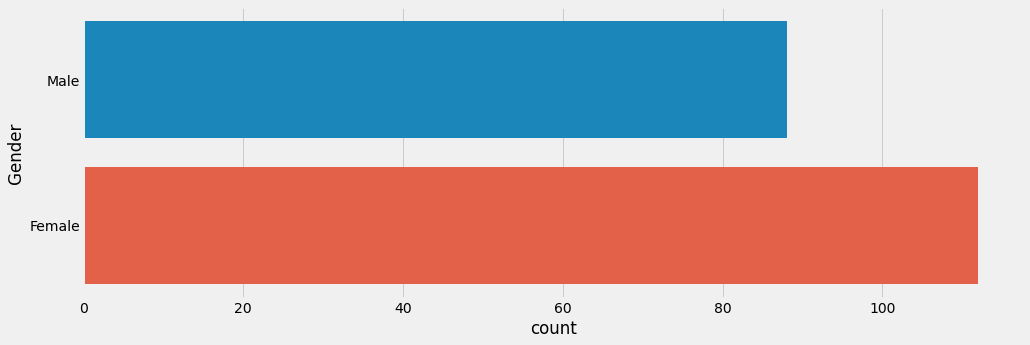

In [75]:
plt.figure(1, figsize = (15, 5))
sns.countplot(data= customers, y = 'Gender')
plt.show()

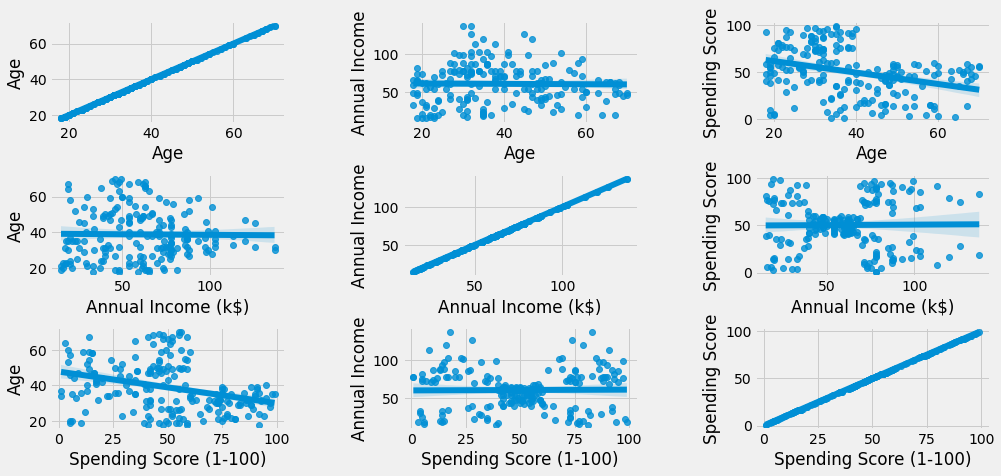

In [76]:
plt.figure(1, figsize = (15, 7))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)'] :
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)'] :
        n += 1
        plt.subplot(3, 3, n)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(x = x, y = y, data=customers)
        plt.ylabel(y.split()[0] + ' ' + y.split()[1] if len(y.split()) > 1 else y)
plt.show()

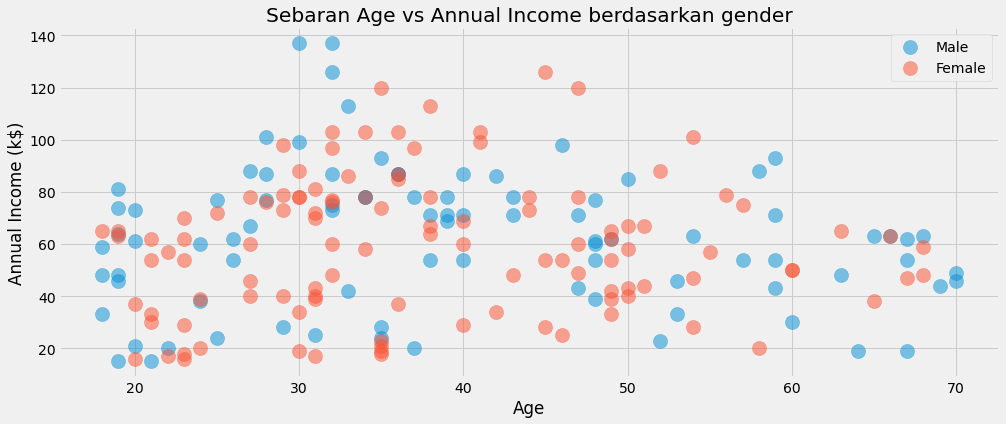

In [77]:
plt.figure(1, figsize = (15, 6))
for gender in ['Male', 'Female'] :
    plt.scatter(x='Age', y='Annual Income (k$)', data=customers[customers['Gender'] ==  gender], s = 200, alpha = 0.5, label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')
plt.title('Sebaran Age vs Annual Income berdasarkan gender')
plt.legend()
plt.show()

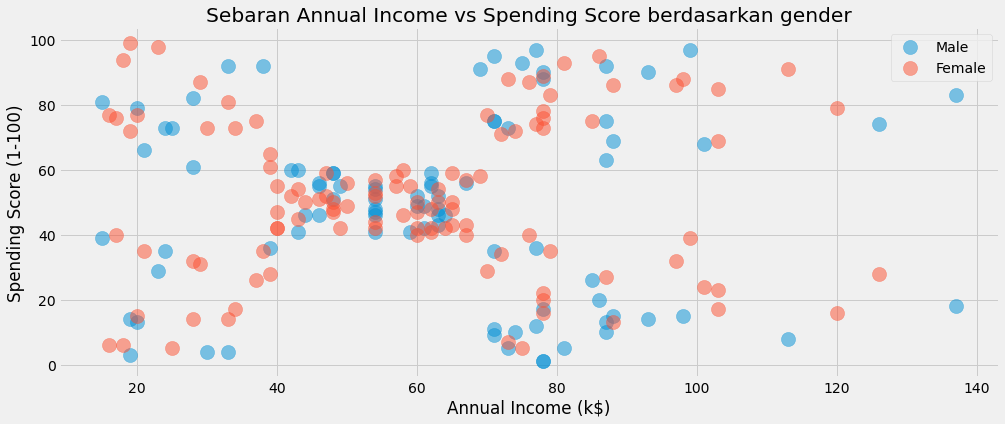

In [78]:
plt.figure(1, figsize = (15, 6))
for gender in ['Male', 'Female'] :
    plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=customers[customers['Gender'] ==  gender], s = 200, alpha = 0.5, label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)')
plt.title('Sebaran Annual Income vs Spending Score berdasarkan gender')
plt.legend()
plt.show()

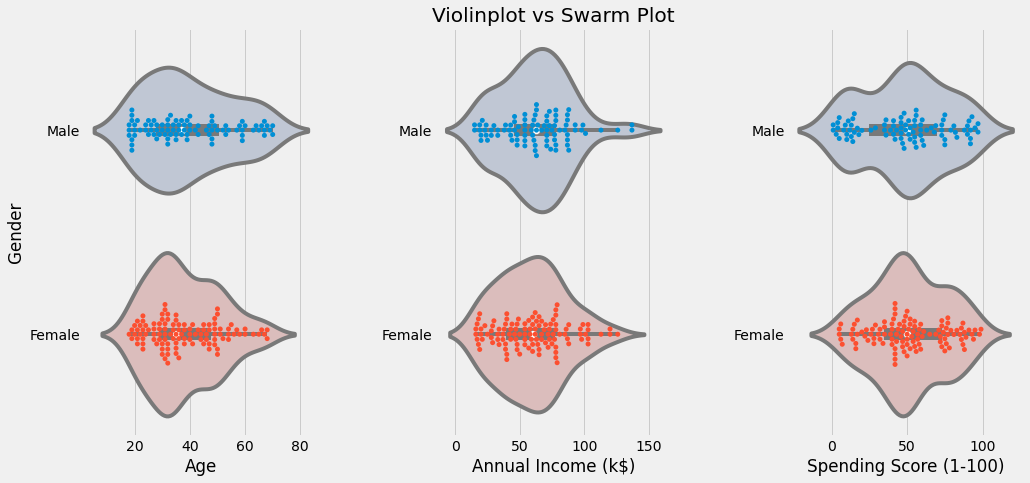

In [79]:
plt.figure(1, figsize = (15, 7))
n = 0
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)'] :
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.violinplot(x = cols, y = 'Gender', data=customers, palette = 'vlag')
    sns.swarmplot(x = cols, y = 'Gender', data=customers)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Violinplot vs Swarm Plot' if n == 2 else '')
plt.show()

# Clustering using KMeans

**1. Segmentation menggunakan Age dan Spending Score**

In [97]:
# Age and spending Score
X1 = customers[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

**Selecting N Clusters based in Inetia**

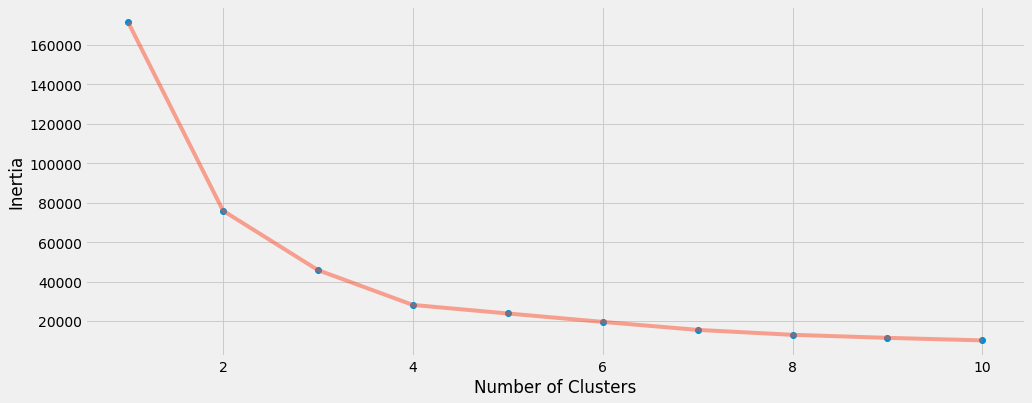

In [98]:
plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-' , alpha=0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

Cluster terbaik adalah clusters 4

In [99]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [100]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

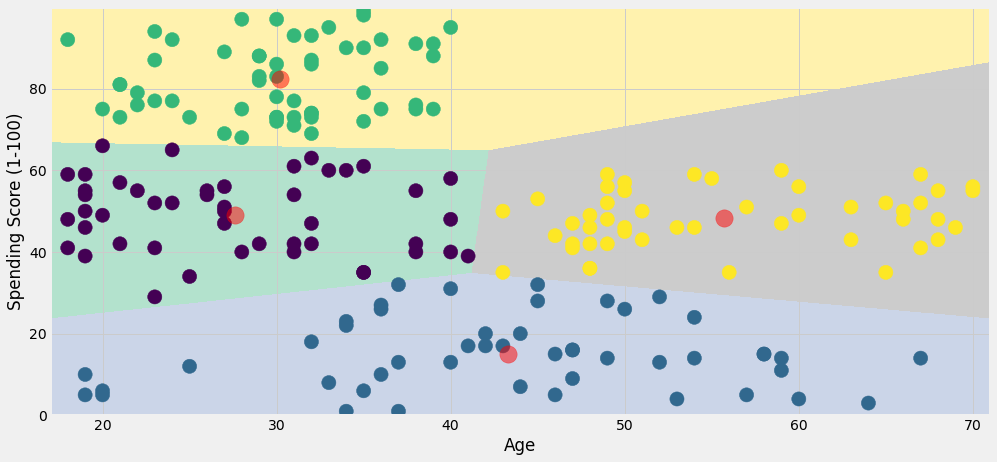

In [101]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = customers , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

**2. Segmentation menggunakan Annual Income dan Spending Score**

In [102]:
# Annual Income and spending Score
X2 = customers[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

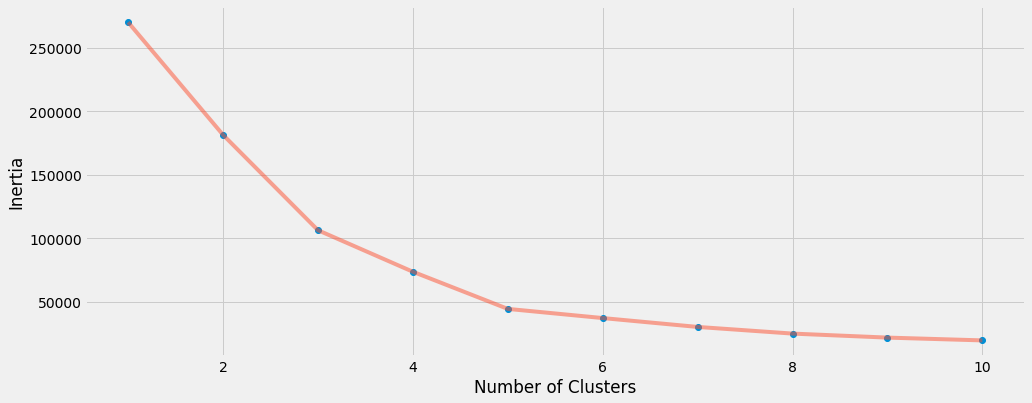

In [103]:
plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-' , alpha=0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

Clusters terbaik adalah clusters 5

In [110]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [111]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

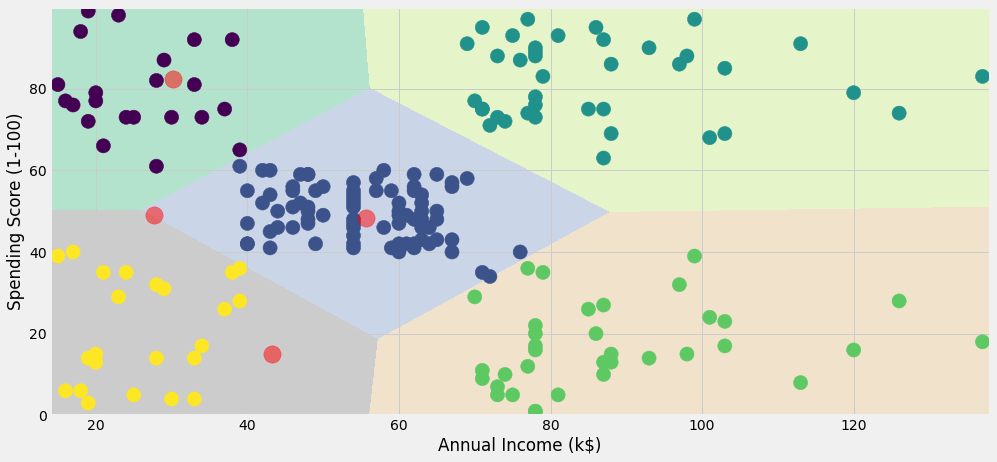

In [112]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = customers , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

**3. Segmentation menggunakan Age, Annual Income dan Spending Score**

In [113]:
# Annual Income and spending Score
X3 = customers[['Age', 'Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

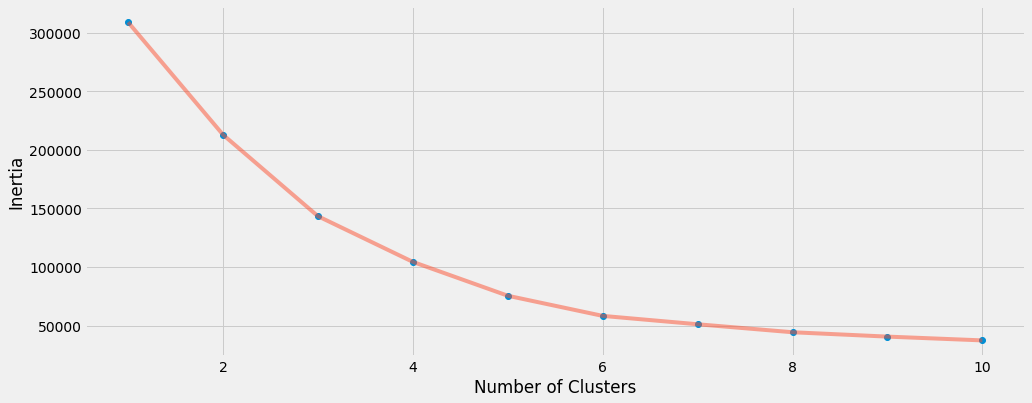

In [117]:
plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-' , alpha=0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

Clusters terbaik adalah clusters 6

In [118]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [119]:
customers['label3'] =  labels3
trace1 = go.Scatter3d(
    x= customers['Age'],
    y= customers['Spending Score (1-100)'],
    z= customers['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = customers['label3'], 
        size= 20,
        line=dict(
            color= customers['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)